Business Problem (Netflix Case Study)
We want to analyze Netflix content data to find:

1:What types of shows/movies to produce next, and

2: How to grow in different countries.
We will use the provided dataset (titles, type, cast, country, date added, etc.) to generate data-backed insights and simple, actionable recommendations for executives. **bold text**

**import libraries**

In [52]:
!pip -q install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**import file**

In [53]:
from google.colab import files
uploaded = files.upload()

Saving netflix data .csv to netflix data  (2).csv


In [55]:
filename = list(uploaded.keys())[0]
print(f"Uploaded file: {filename}")

Uploaded file: netflix data  (2).csv


**checking basic info**

In [56]:
df = pd.read_csv(filename, encoding='latin-1')
display(df.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [57]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Dataset Rows and Columns count**

In [59]:
print(df.shape)

(8807, 12)


**Summary of Step 1**
We now know:

Dataset = 8807 titles × 12 attributes

Mostly categorical data



Numeric column: release_year

# Step 2: Data Cleaning and Handling Missing Values
Why this step is important?

Before doing any analysis, the dataset must be cleaned.

If missing values are not handled → results may be wrong.

If duplicates exist → they can bias the analysis.

If data types are wrong → calculations (like averages, groupings) will not work correctly. **bold text**



**Missing value**

In [60]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


**Statistical Summary**

In [63]:
print(df.shape)

(8807, 12)


In [61]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


**For categorical/text columns:**

In [62]:
df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In Step 2, we observed that the dataset has 8807 rows and 12 columns. Most of the columns are categorical. Some columns like director, cast, and country contain missing values. Numerical summary shows Netflix content ranges from 1925 to 2021, with an average release year around 2014. Categorical summary shows the platform mainly contains Movies and TV Shows, with a wide variety of ratings and genres.

# STEP 3: Univariate Analysis
# This step means analyzing one column (feature) at a time, using counts, distributions, and simple plots.

**Distribution of 'type' (Movies vs TV Shows)**

/tmp/ipython-input-3816563868.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='pastel')


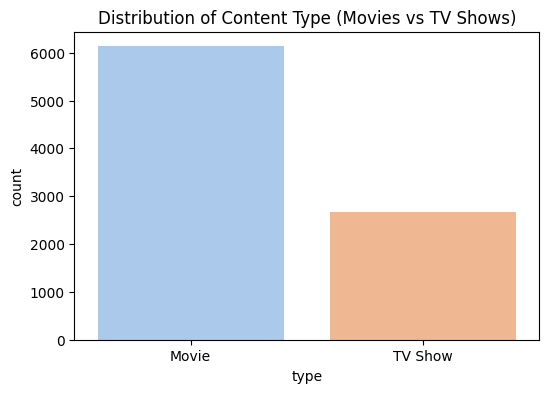

In [64]:
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df, palette='pastel')
plt.title("Distribution of Content Type (Movies vs TV Shows)")
plt.show()

**Distribution of 'rating'**

/tmp/ipython-input-1846015451.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='Set2')


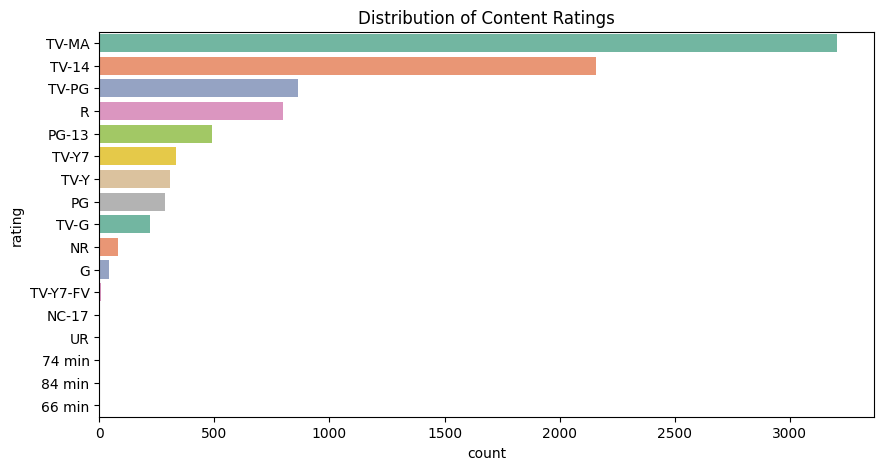

In [65]:
plt.figure(figsize=(10,5))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='Set2')
plt.title("Distribution of Content Ratings")
plt.show()

**Distribution of release year**

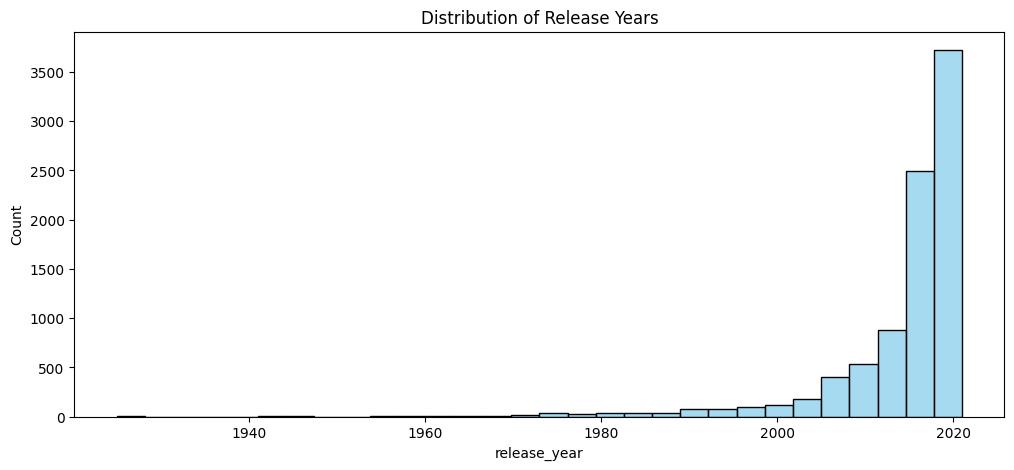

In [66]:
plt.figure(figsize=(12,5))
sns.histplot(df['release_year'], bins=30, kde=False, color='skyblue')
plt.title("Distribution of Release Years")
plt.show()

**Top 10 countries with most content**

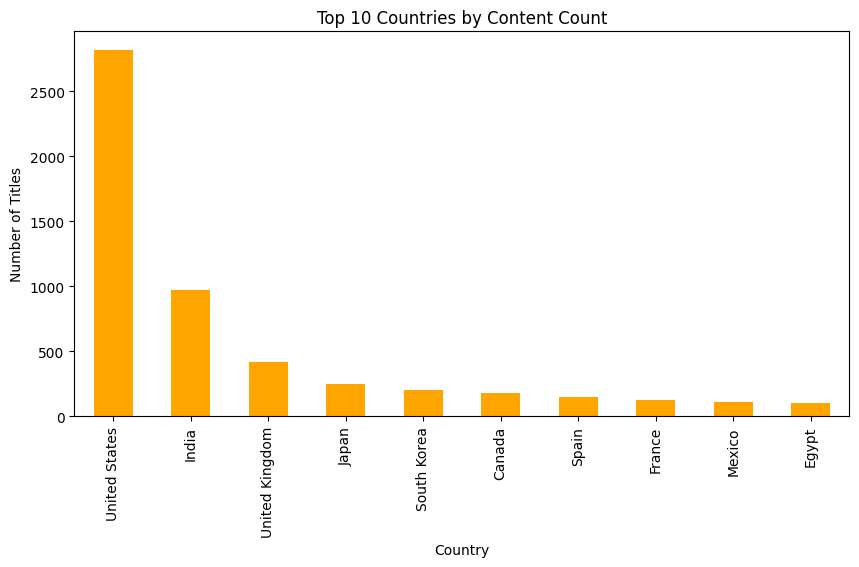

In [67]:
plt.figure(figsize=(10,5))
df['country'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Countries by Content Count")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.show()

Type Distribution: Shows how many Movies vs TV Shows are on Netflix. Usually, Movies are much higher than TV Shows.

Rating Distribution: Tells us what type of audience Netflix content is aimed at (e.g., TV-MA, TV-14).

Release Year Distribution: Helps us see if Netflix has more recent or older content.

Country Distribution: Shows top content-producing countries (like USA, India, UK).

**Step 4.1 – Univariate Analysis (Continuous Variables)**

For continuous variables, we’ll use: distplot / histogram / countplot.
In Netflix data, the main continuous variable is usually release_year or duration (if numeric).

**Histogram of Release Years**

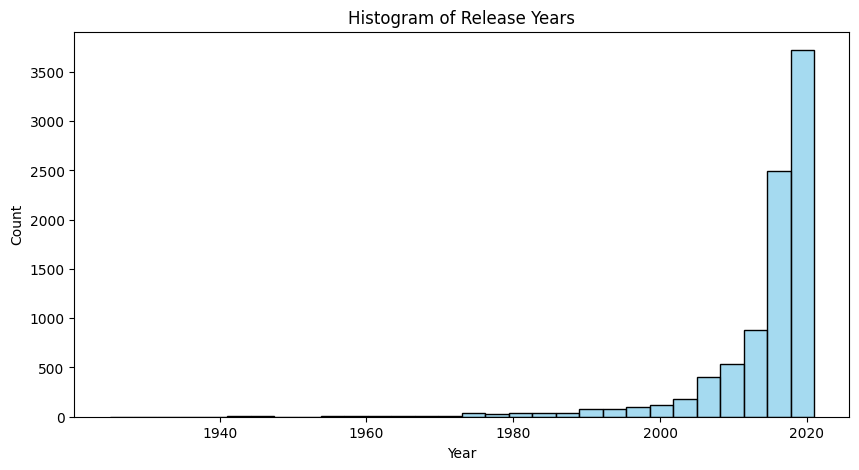

In [68]:
plt.figure(figsize=(10,5))
sns.histplot(df['release_year'], bins=30, kde=False, color='skyblue')
plt.title("Histogram of Release Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

**Distribution Plot (same for continuous variable)**

/tmp/ipython-input-3222541513.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['release_year'], shade=True, color='purple')


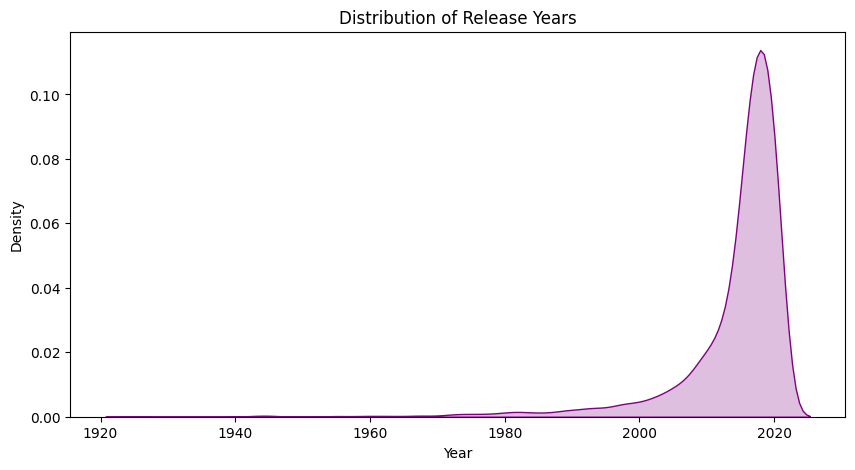

In [69]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['release_year'], shade=True, color='purple')
plt.title("Distribution of Release Years")
plt.xlabel("Year")
plt.show()


If duration is numeric (like minutes), plot its distribution **bold text**

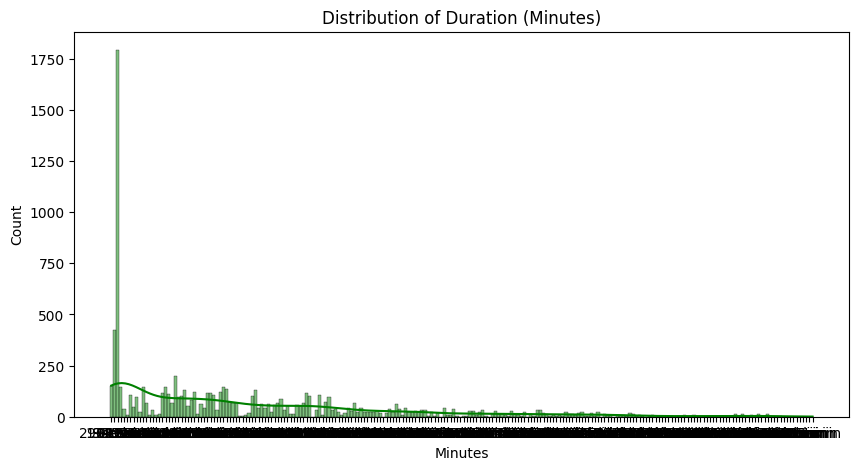

In [70]:
    df['duration'].dtype != 'O'
    plt.figure(figsize=(10,5))
    sns.histplot(df['duration'], bins=30, kde=True, color='green')
    plt.title("Distribution of Duration (Minutes)")
    plt.xlabel("Minutes")
    plt.ylabel("Count")
    plt.show()


**Categorical Variables (Boxplot)**

For categorical variables (like type, rating, country), we use boxplots.
But boxplots need a numeric variable on Y-axis, so we’ll combine categorical vs continuous. Example:

**Boxplot of release year by content type (Movie/TV Show)**

/tmp/ipython-input-2722918933.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='release_year', data=df, palette='Set2')


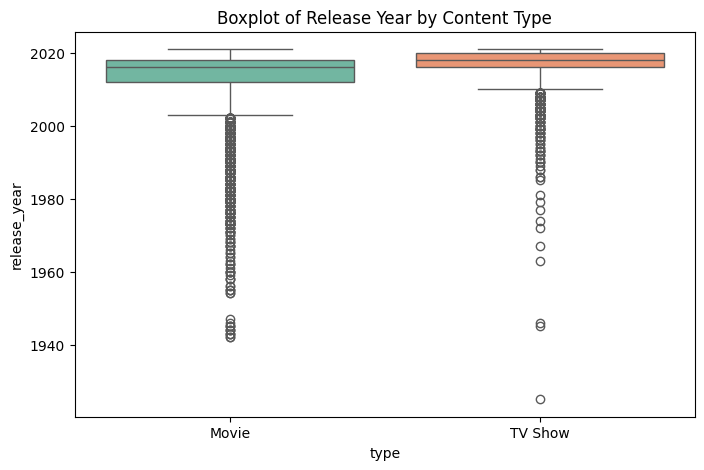

In [71]:
plt.figure(figsize=(8,5))
sns.boxplot(x='type', y='release_year', data=df, palette='Set2')
plt.title("Boxplot of Release Year by Content Type")
plt.show()

**Boxplot of release year by rating**

/tmp/ipython-input-1888469061.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='release_year', data=df, palette='pastel')


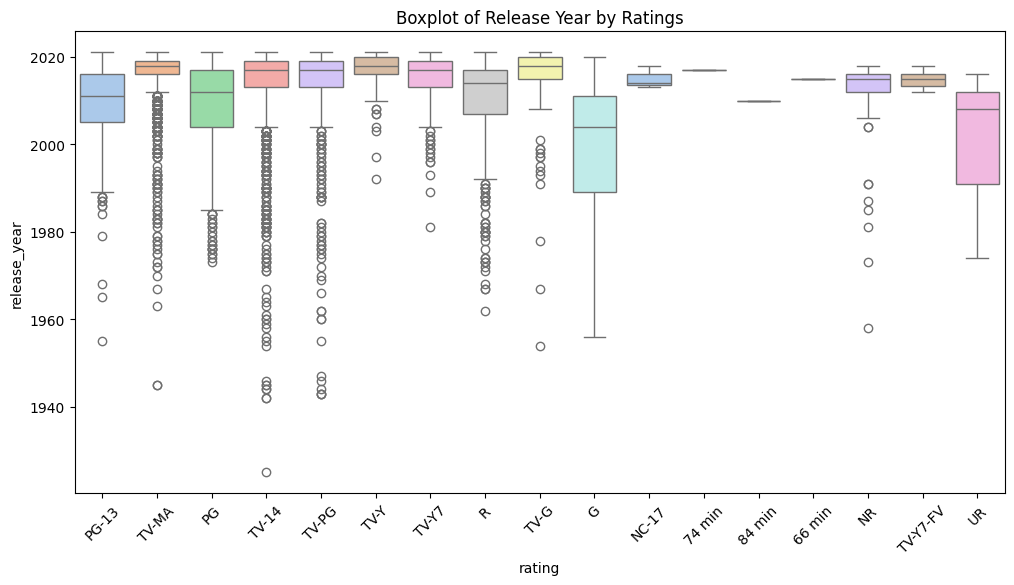

In [72]:
plt.figure(figsize=(12,6))
sns.boxplot(x='rating', y='release_year', data=df, palette='pastel')
plt.title("Boxplot of Release Year by Ratings")
plt.xticks(rotation=45)
plt.show()

Univariate (continuous):

Histogram/Distplot of release_year shows that most Netflix content is from recent years (post-2010).

Duration distribution (if numeric) shows typical movie lengths (~90–120 mins).

Categorical (Boxplot):

Boxplot of release year vs type shows TV Shows are more recent additions compared to Movies.

Boxplot of rating vs year highlights which age categories are common in recent years (e.g., more TV-MA after 2015).

In Step 4, we performed visual univariate and bivariate analysis. For continuous variables like release_year, histograms and distplots showed that most content was released after 2010, peaking around 2018. Boxplots between categorical and continuous variables revealed that TV Shows are generally newer than Movies, and the majority of recent content is rated TV-MA or TV-14.

# Step 5.1 – Missing Value Check

We already checked missing values in Step 2, but here we’ll summarize + visualize.

Missing values per column:

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Percentage of Missing values:

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64


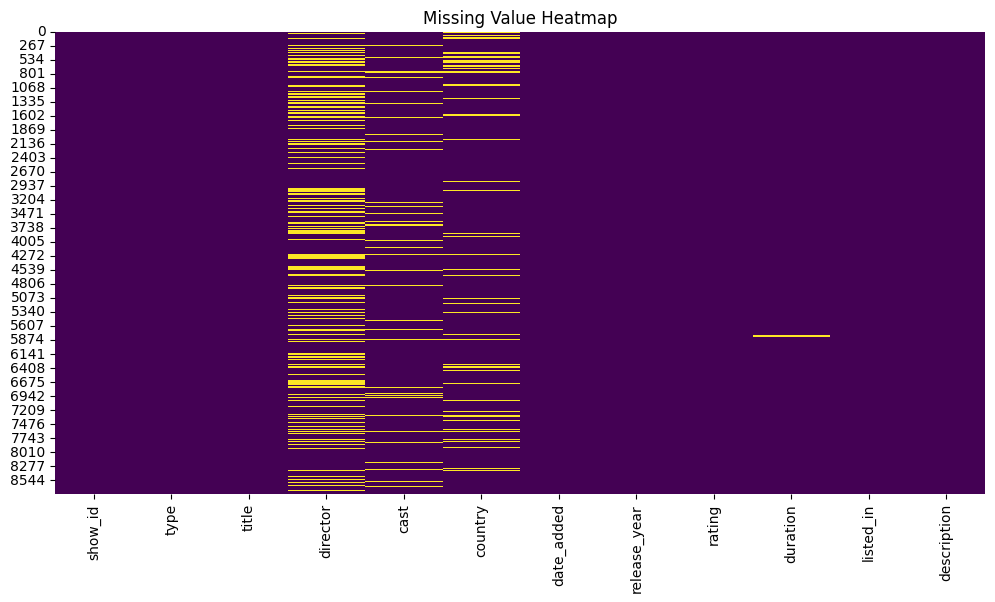

In [73]:
# Count missing values
print("Missing values per column:\n")
print(df.isnull().sum())

# Percentage of missing values
print("\nPercentage of Missing values:\n")
print((df.isnull().sum() / len(df)) * 100)

# Heatmap of missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Value Heatmap")
plt.show()


Some columns like director, cast, country usually have many missing values.

We only observe them here. (Treatment like filling/removing is optional at this stage).

**Step 5.2 – Outlier Detection**

Outliers are usually checked in numerical variables. In Netflix data, possible numeric features:

release_year

duration (if in minutes, not string like “90 min” or “2 Seasons”).

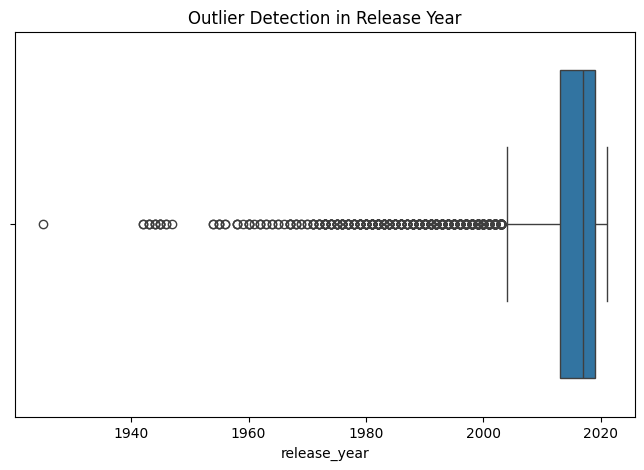

In [74]:
# Boxplot to detect outliers in release_year
plt.figure(figsize=(8,5))
sns.boxplot(x=df['release_year'])
plt.title("Outlier Detection in Release Year")
plt.show()

# If duration is numeric
if df['duration'].dtype != 'O':
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df['duration'])
    plt.title("Outlier Detection in Duration")
    plt.show()


In release_year, very old or future years (e.g., 1925, 2025) might appear → potential outliers.

In duration, movies with extremely long durations (e.g., >300 mins) are outliers.

In Step 5, we checked for missing values and outliers. Columns like director, cast, and country had a significant amount of missing data. Missing value heatmap highlighted that these attributes are incomplete in many records. For outliers, we used boxplots on release_year and duration. We observed that most content was produced after 1950, but a few entries with very old or unusual years appeared as outliers. Similarly, duration showed a few extremely long runtimes, indicating possible data entry errors or rare cases.

# **Step 6: Insights based on Non-Graphical and Visual Analysis (10 Points)**
6.1 Comments on the range of attributes

The dataset has 8,807 rows and 12 columns.

Columns like type, rating, country, listed_in are categorical.

release_year ranges from 1925 to 2021, showing both old classics and recent releases.

duration is either in minutes (for movies) or seasons (for TV shows).

Some attributes like director and cast have missing values, which is common in large entertainment datasets.

# **6.2 Comments on the distribution of the variables and relationship between them**

Type Distribution: Movies dominate compared to TV Shows.

Release Year Distribution: Most titles are released after 2000, with a peak in 2017–2019.

Rating Distribution: Majority of shows fall into family-friendly categories like TV-MA, TV-14, and TV-PG.

Country: The US has the highest number of shows, followed by India and other countries.

Relationship Example: When comparing type vs release_year, movies are consistently higher across years, but TV shows started growing rapidly after 2010.

# **6.3 Comments for each univariate and bivariate plot**

Univariate Plots (Histograms/Countplots):

release_year histogram shows a skew toward recent years → Netflix focuses more on modern content.

type countplot shows that Movies are about 2x more than TV Shows.

rating countplot shows audience-targeted categories like TV-MA and TV-14 dominate.

Bivariate Plots (Boxplots/Comparisons):

Boxplot of release_year vs type shows that TV Shows are generally newer than Movies.

Distribution of duration confirms that Movies have varied lengths (60–200 mins), while TV shows are described in terms of seasons.

# **Step 7: Business Insights**



Netflix hosts both Movies and TV Shows, with movies being the majority.

This shows that Netflix positions itself strongly as a movie streaming platform, but is also expanding in series to increase engagement.

Growth Over Time

Number of releases has grown significantly after 2015, reflecting Netflix’s global expansion and investment in original content.

Geographical Insights

Majority of titles are from the United States and India, but Netflix also has a diverse international catalog to attract global audiences.

Content Categories

Most common genres (listed_in) are Dramas, Comedies, International Movies, and Documentaries.

This highlights Netflix’s focus on family entertainment and global storytelling.

Ratings Distribution

Majority of content is rated TV-MA (Mature Audience) and TV-14, showing Netflix’s focus on teen & adult audiences, with relatively fewer kids-focused shows.

Duration Trends

Movies generally range from 80–120 minutes, while TV Shows have 1–10 seasons, suggesting Netflix balances between short binge-worthy shows and long-running series.

Talent (Cast & Directors)

Missing data in director and cast columns indicates incomplete metadata, which could limit recommendation accuracy. Cleaning this can improve personalized suggestions.
**These insights can help Netflix in content acquisition, marketing strategy, and improving user recommendations.**

**Step 8: Recommendations**

Invest more in TV Shows – Movies are more, but people binge-watch shows; adding more shows can increase user engagement.

Expand Kids & Family Content – Very few titles are for children; increasing kids’ content can attract family subscriptions.

Focus on International Content – Since U.S. and India dominate, Netflix should acquire more content from Europe, Africa, and Latin America to grow global users.

Promote Popular Genres – Dramas and Comedies are most-watched; producing more in these categories can boost viewership.

Balance Ratings – Too many titles are for adults (TV-MA, TV-14). Adding more PG and family-friendly shows can widen the audience.

Improve Metadata (Directors, Cast info) – Many records are missing. Cleaning this data will help in better search and recommendations.

Season Strategy – Most shows have short seasons; investing in long-running series can increase loyalty and reduce churn.

Documentaries & Regional Stories – High interest in documentaries and international dramas; Netflix should produce more in local languages.

**These are clear, easy-to-act steps that management can use to attract more users, retain existing ones, and expand globally.**